In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!nvidia-smi

In [ ]:
# import torch
# import torch.nn as nn
# import numpy as np
# from torch.utils.data import DataLoader
# from torchvision import datasets, transforms
# from torchvision.utils import save_image

# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# input_dim = 100
# batch_size = 128
# num_epoch = 10


# # =================================================生成器================================================================
# class Generator(nn.Module):
#     def __init__(self, input_dim):
#         super(Generator, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 32 * 32)
#         self.br1 = nn.Sequential(
#             nn.BatchNorm1d(1024),
#             nn.ReLU()
#         )
#         self.fc2 = nn.Linear(32 * 32, 128 * 7 * 7)
#         self.br2 = nn.Sequential(
#             nn.BatchNorm1d(128 * 7 * 7),
#             nn.ReLU()
#         )
#         self.conv1 = nn.Sequential(
#             nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#         )
#         self.conv2 = nn.Sequential(
#             nn.ConvTranspose2d(64, 1, 4, stride=2, padding=1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         x = self.br1(self.fc1(x))
#         x = self.br2(self.fc2(x))
#         x = x.reshape(-1, 128, 7, 7)
#         x = self.conv1(x)
#         output = self.conv2(x)
#         return output


# # =================================================判别器================================================================
# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.conv1 = nn.Sequential(
#             nn.Conv2d(1, 32, 5, stride=1),
#             nn.LeakyReLU(0.2)
#         )
#         self.pl1 = nn.MaxPool2d(2, stride=2)
#         self.conv2 = nn.Sequential(
#             nn.Conv2d(32, 64, 5, stride=1),
#             nn.LeakyReLU(0.2)
#         )
#         self.pl2 = nn.MaxPool2d(2, stride=2)
#         self.fc1 = nn.Sequential(
#             nn.Linear(64 * 4 * 4, 1024),
#             nn.LeakyReLU(0.2)
#         )
#         self.fc2 = nn.Sequential(
#             nn.Linear(1024, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.pl1(x)
#         x = self.conv2(x)
#         x = self.pl2(x)
#         x = x.view(x.shape[0], -1)
#         x = self.fc1(x)
#         output = self.fc2(x)
#         return output

# # ==================================================训练================================================================
# def training(x):
#     '''判别器'''
#     real_x = x.to(device)
#     real_output = D(real_x)
#     real_loss = loss_func(real_output, torch.ones_like(real_output).to(device))

#     fake_x = G(torch.randn([batch_size, input_dim]).to(device)).detach()
#     fake_output = D(fake_x)
#     fake_loss = loss_func(fake_output, torch.zeros_like(fake_output).to(device))

#     loss_D = real_loss + fake_loss

#     optim_D.zero_grad()
#     loss_D.backward()
#     optim_D.step()

#     '''生成器'''
#     fake_x = G(torch.randn([batch_size, input_dim]).to(device))
#     fake_output = D(fake_x)
#     loss_G = loss_func(fake_output, torch.ones_like(fake_output).to(device))

#     optim_G.zero_grad()
#     loss_G.backward()
#     optim_G.step()

#     return loss_D, loss_G


# if __name__ == '__main__':
#     train_dataset = datasets.MNIST(root="./data/", train=True, transform=transforms.ToTensor(), download=False)
#     train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

#     G = Generator(input_dim).to(device)
#     D = Discriminator().to(device)
#     optim_G = torch.optim.Adam(G.parameters(), lr=0.0002)
#     optim_D = torch.optim.Adam(D.parameters(), lr=0.0002)
#     loss_func = nn.BCELoss()

#     for epoch in range(num_epoch):
#         total_loss_D, total_loss_G = 0, 0
#         for i, (x, _) in enumerate(train_loader):
#             loss_D, loss_G = training(x)

#             total_loss_D += loss_D
#             total_loss_G += loss_G

#             if (i + 1) % 100 == 0 or (i + 1) == len(train_loader):
#                 print('Epoch {:02d} | Step {:04d} / {} | Loss_D {:.4f} | Loss_G {:.4f}'.format(epoch, i + 1, len(train_loader), total_loss_D / (i + 1), total_loss_G / (i + 1)))

#         x = torch.randn(64, input_dim).to(device)
#         img = G(x)
#         save_image(img, './data/results/' + '%d_epoch.png' % epoch)

In [1]:
import os

# 创建目录
results_dir = '/kaggle/working/data/results'
os.makedirs(results_dir, exist_ok=True)

In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

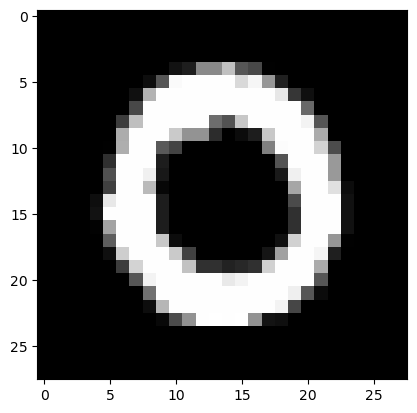

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# 获取第一张图片的像素数据
image = train_data.iloc[1, 1:].values
image = image.reshape((28, 28))

# 可视化图片
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms

# class CustomDataset(Dataset):
#     def __init__(self, data_path):
#         # 从文件中加载数据
#         self.data = np.loadtxt(data_path, delimiter=',', skiprows=1)
#         self.transform = transforms.Compose([
#             transforms.ToTensor(),
#         ])
    
#     def __len__(self):
#         # 返回数据集的大小
#         return len(self.data)
    
#     def __getitem__(self, idx):
#         # 获取一个数据样本
#         image = self.data[idx, 1:].reshape((28, 28)).astype(np.uint8)
#         label = self.data[idx, 0]
#         image = self.transform(image)
#         return image, label

# # 创建自定义数据集实例
# train_dataset = CustomDataset('/kaggle/input/digit-recognizer/train.csv')

# # 创建数据加载器
# train_loader = DataLoader(
#     dataset=train_dataset,
#     batch_size=128,
#     shuffle=True
# )

In [5]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import save_image

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

input_dim = 100
batch_size = 128
num_epoch = 10


# =================================================生成器================================================================
class Generator(nn.Module):
    def __init__(self, input_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32 * 32)
        self.br1 = nn.Sequential(
            nn.BatchNorm1d(1024),
            nn.ReLU()
        )
        self.fc2 = nn.Linear(32 * 32, 128 * 7 * 7)
        self.br2 = nn.Sequential(
            nn.BatchNorm1d(128 * 7 * 7),
            nn.ReLU()
        )
        self.conv1 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.ConvTranspose2d(64, 1, 4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.br1(self.fc1(x))
        x = self.br2(self.fc2(x))
        x = x.reshape(-1, 128, 7, 7)
        x = self.conv1(x)
        output = self.conv2(x)
        return output


# =================================================判别器================================================================
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, 5, stride=1),
            nn.LeakyReLU(0.2)
        )
        self.pl1 = nn.MaxPool2d(2, stride=2)
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 5, stride=1),
            nn.LeakyReLU(0.2)
        )
        self.pl2 = nn.MaxPool2d(2, stride=2)
        self.fc1 = nn.Sequential(
            nn.Linear(64 * 4 * 4, 1024),
            nn.LeakyReLU(0.2)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(1024, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.pl1(x)
        x = self.conv2(x)
        x = self.pl2(x)
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        output = self.fc2(x)
        return output

# ==================================================训练================================================================
def training(x):
    '''判别器'''
    real_x = x.to(device)
    real_output = D(real_x)
    real_loss = loss_func(real_output, torch.ones_like(real_output).to(device))

    fake_x = G(torch.randn([batch_size, input_dim]).to(device)).detach()
    fake_output = D(fake_x)
    fake_loss = loss_func(fake_output, torch.zeros_like(fake_output).to(device))

    loss_D = real_loss + fake_loss

    optim_D.zero_grad()
    loss_D.backward()
    optim_D.step()

    '''生成器'''
    fake_x = G(torch.randn([batch_size, input_dim]).to(device))
    fake_output = D(fake_x)
    loss_G = loss_func(fake_output, torch.ones_like(fake_output).to(device))

    optim_G.zero_grad()
    loss_G.backward()
    optim_G.step()

    return loss_D, loss_G
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, data_path):
        # 从文件中加载数据
        self.data = np.loadtxt(data_path, delimiter=',', skiprows=1)
        self.transform = transforms.Compose([
            transforms.ToTensor(),
        ])
    
    def __len__(self):
        # 返回数据集的大小
        return len(self.data)
    
    def __getitem__(self, idx):
        # 获取一个数据样本
        image = self.data[idx, 1:].reshape((28, 28)).astype(np.uint8)
        label = self.data[idx, 0]
        image = self.transform(image)
        return image, label


if __name__ == '__main__':
#     train_dataset = datasets.MNIST(root="./data/", train=True, transform=transforms.ToTensor(), download=False)
#     train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
    # 创建自定义数据集实例
    train_dataset = CustomDataset('/kaggle/input/digit-recognizer/train.csv')

    # 创建数据加载器
    train_loader = DataLoader(
        dataset=train_dataset,
        batch_size=128,
        shuffle=True
    )
    G = Generator(input_dim).to(device)
    D = Discriminator().to(device)
    optim_G = torch.optim.Adam(G.parameters(), lr=0.0002)
    optim_D = torch.optim.Adam(D.parameters(), lr=0.0002)
    loss_func = nn.BCELoss()

    for epoch in range(num_epoch):
        total_loss_D, total_loss_G = 0, 0
        for i, (x, _) in enumerate(train_loader):
            loss_D, loss_G = training(x)

            total_loss_D += loss_D
            total_loss_G += loss_G

            if (i + 1) % 100 == 0 or (i + 1) == len(train_loader):
                print('Epoch {:02d} | Step {:04d} / {} | Loss_D {:.4f} | Loss_G {:.4f}'.format(epoch, i + 1, len(train_loader), total_loss_D / (i + 1), total_loss_G / (i + 1)))

        x = torch.randn(64, input_dim).to(device)
        img = G(x)
        save_image(img, './data/results/' + '%d_epoch.png' % epoch)

Epoch 00 | Step 0100 / 329 | Loss_D 0.1513 | Loss_G 5.7894
Epoch 00 | Step 0200 / 329 | Loss_D 0.1583 | Loss_G 5.0358
Epoch 00 | Step 0300 / 329 | Loss_D 0.2222 | Loss_G 4.3661
Epoch 00 | Step 0329 / 329 | Loss_D 0.2407 | Loss_G 4.2258
Epoch 01 | Step 0100 / 329 | Loss_D 0.5163 | Loss_G 2.5145
Epoch 01 | Step 0200 / 329 | Loss_D 0.5747 | Loss_G 2.3846
Epoch 01 | Step 0300 / 329 | Loss_D 0.6102 | Loss_G 2.2561
Epoch 01 | Step 0329 / 329 | Loss_D 0.6197 | Loss_G 2.2190
Epoch 02 | Step 0100 / 329 | Loss_D 0.7537 | Loss_G 1.8028
Epoch 02 | Step 0200 / 329 | Loss_D 0.7833 | Loss_G 1.7338
Epoch 02 | Step 0300 / 329 | Loss_D 0.7897 | Loss_G 1.7028
Epoch 02 | Step 0329 / 329 | Loss_D 0.7874 | Loss_G 1.6989
Epoch 03 | Step 0100 / 329 | Loss_D 0.8010 | Loss_G 1.6620
Epoch 03 | Step 0200 / 329 | Loss_D 0.8162 | Loss_G 1.6310
Epoch 03 | Step 0300 / 329 | Loss_D 0.8211 | Loss_G 1.6196
Epoch 03 | Step 0329 / 329 | Loss_D 0.8254 | Loss_G 1.6162
Epoch 04 | Step 0100 / 329 | Loss_D 0.8609 | Loss_G 1.61

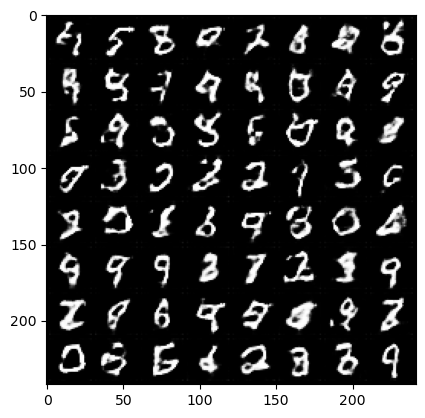

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# 读取图片
image = Image.open('./data/results/2_epoch.png')

# 将图片转换为 numpy 数组
image_array = np.array(image)

# 显示图片
plt.imshow(image_array)
plt.show()

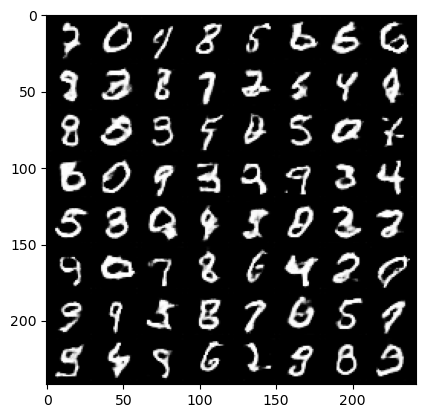

In [7]:
# 读取图片
image = Image.open('./data/results/6_epoch.png')

# 将图片转换为 numpy 数组
image_array = np.array(image)

# 显示图片
plt.imshow(image_array)
plt.show()

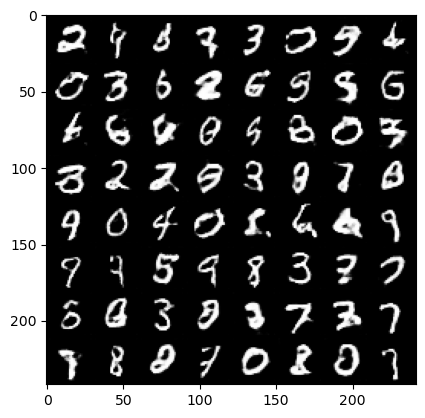

In [8]:
image = Image.open('./data/results/8_epoch.png')

# 将图片转换为 numpy 数组
image_array = np.array(image)

# 显示图片
plt.imshow(image_array)
plt.show()

In [ ]:
import os
import zipfile
import datetime

def file2zip(packagePath, zipPath):
    '''
  :param packagePath: 文件夹路径
  :param zipPath: 压缩包路径
  :return:
  '''
    zip = zipfile.ZipFile(zipPath, 'w', zipfile.ZIP_DEFLATED)
    for path, dirNames, fileNames in os.walk(packagePath):
        fpath = path.replace(packagePath, '')
        for name in fileNames:
            fullName = os.path.join(path, name)
            name = fpath + '\\' + name
            zip.write(fullName, name)
    zip.close()


if __name__ == "__main__":
    # 文件夹路径
    packagePath = '/kaggle/working/'
    zipPath = '/kaggle/working/output.zip'
    if os.path.exists(zipPath):
        os.remove(zipPath)
    file2zip(packagePath, zipPath)
    print("打包完成")
    print(datetime.datetime.utcnow())


In [ ]:
import shutil
import os

if __name__ == '__main__':
    path = '/kaggle/working/model'
    if os.path.exists(path):
        shutil.rmtree(path)
        print('删除完成')
    else:
        print('原本为空')